In [3]:
import requests
import json
import pyspark as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [4]:
csvdf = pd.read_csv('AllPrintingsCSVFiles/cards.csv')
pricedf = pd.read_json('AllPrices.json')
pricedf.reset_index(inplace=True)
df=pricedf.merge(csvdf, how='inner',left_on='index', right_on='uuid')
df.sort_values('edhrecRank',inplace=True)
df=df[df.availability!='mtgo']

/home/chris/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (12,16,19,40,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47354 entries, 0 to 47353
Data columns (total 79 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    47354 non-null  int64  
 1   index_x                  47354 non-null  object 
 2   data                     47354 non-null  object 
 3   meta                     0 non-null      object 
 4   index_y                  47354 non-null  int64  
 5   id                       47354 non-null  int64  
 6   artist                   47352 non-null  object 
 7   asciiName                49 non-null     object 
 8   availability             47353 non-null  object 
 9   borderColor              47354 non-null  object 
 10  cardKingdomFoilId        27916 non-null  float64
 11  cardKingdomId            42019 non-null  float64
 12  colorIdentity            42249 non-null  object 
 13  colorIndicator           45 non-null     object 
 14  colors                

In [5]:
df.reset_index(inplace=True)

In [6]:
csvdf=pd.read_csv('mtgjson_pricing.csv')
csvdf.drop('data',axis=1,inplace=True)
csvdf.drop('Unnamed: 0',axis=1,inplace=True)

In [15]:
card_name=input("For what card would you like prices?")
setcodes=df[df.name==card_name]['setCode'].values

For what card would you like prices?Ugin, the Spirit Dragon


In [18]:
print(f'that card is available in {setcodes}')
setid=input("For what set would you like prices?")

that card is available in ['MED' 'M21' 'M21' 'M21' 'UGIN' 'PM21' 'FRF' 'PM21']
For what set would you like prices?M21


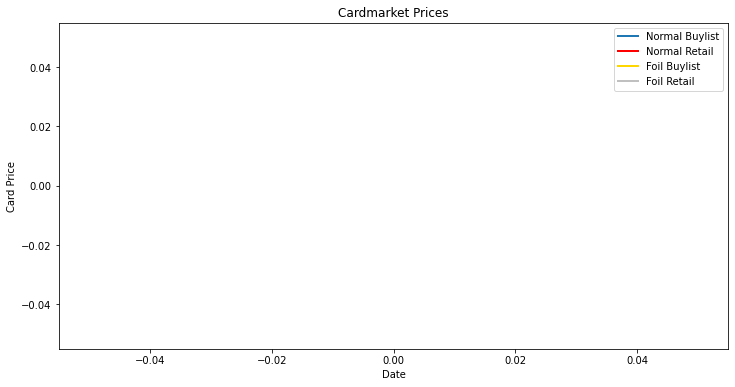

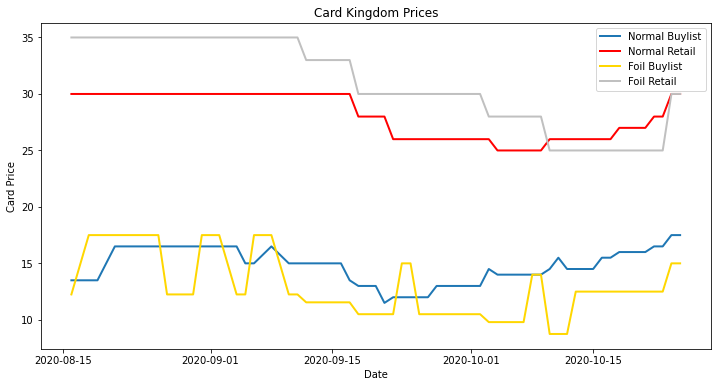

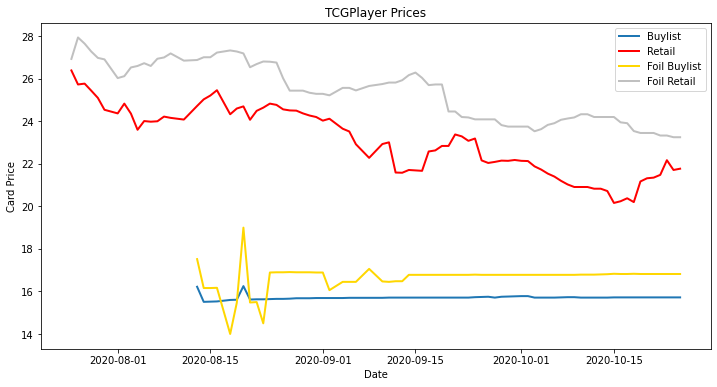

In [19]:
id=df[(df.name==card_name)&(df.setCode==setid)].index

card_price_history(id[0])

0        0
1        0
2        0
3        0
4        0
5        1
6        1
7        1
8        0
9        0
10       1
11       0
12       0
13       0
14       0
15       0
16       1
17       0
18       0
19       0
20       0
21       1
22       0
23       0
24       0
25       1
26       0
27       0
28       1
29       0
30       0
31       0
32       0
33       1
34       0
35       1
36       0
37       0
38       0
39       1
40       0
41       1
42       0
43       0
44       1
45       1
46       0
47       1
48       1
49       0
50       1
51       0
52       1
53       1
54       0
55       1
56       1
57       0
58       1
59       0
60       0
61       0
62       0
63       1
64       1
65       1
66       0
67       1
68       1
69       0
70       0
71       1
72       0
73       0
74       1
75       0
76       0
77       1
78       0
79       0
80       1
81       1
82       0
83       0
84       1
85       1
86       1
87       0
88       0
89       1
90       1

In [12]:
def card_price_history(id):

#unpack the json prices and create charts showing the price change for all attributes over the past 90 days

    nckbld=[]
    nckblp=[]
    nckrd=[]
    nckrp=[]
    ncmbld=[]
    ncmblp=[]
    ncmrd=[]
    ncmrp=[]
    ntcgbld=[]
    ntcgblp=[]
    ntcgrd=[]
    ntcgrp=[]
    fckbld=[]
    fckblp=[]
    fckrd=[]
    fckrp=[]
    fcmbld=[]
    fcmblp=[]
    fcmrd=[]
    fcmrp=[]
    ftcgbld=[]
    ftcgblp=[]
    ftcgrd=[]
    ftcgrp=[]
    
    
    for a,b in df.data[id].items():
        if a == 'paper':
            for c,d in b.items():
                if c == 'cardkingdom':
                    for e,f in d.items():
                        if e == 'buylist':
                            if isinstance(f,dict):
                                for g,h in f.items():
                                    if g == 'normal':
                                        for k,v in h.items():
                                            nckbld.append(k) 
                                            nckblp.append(v)
                                           
                                        
                                    if g == 'foil':
                                        for k,v in h.items():
                                            fckbld.append(k) 
                                            fckblp.append(v)
                                            

                        if e == 'retail':
                            if isinstance(f,dict):
                                for g,h in f.items():
                                    if g == 'normal':
                                        for k,v in h.items():
                                            nckrd.append(k)
                                            nckrp.append(v)
                                    if g == 'foil':
                                        for k,v in h.items():
                                            fckrd.append(k)
                                            fckrp.append(v)

                if c == 'cardmarket':
                    for e,f in d.items():
                        if e == 'buylist':
                            if isinstance(f,dict):
                                for g,h in f.items():
                                    if g =='normal':
                                        for k,v in h.items():
                                            ncmbld.append(k)
                                            ncmblp.append(v)
                                    if g =='foil':
                                        for k,v in h.items():
                                            fcmbld.append(k)
                                            fcmblp.append(v)

                        if e == 'retail':
                            if isinstance(f,dict):
                                for g,h in f.items():
                                    if g =='normal':
                                        for k,v in h.items():
                                            ncmrd.append(k)
                                            ncmrp.append(v)
                                    if g =='foil':
                                        for k,v in h.items():
                                            fcmrd.append(k)
                                            fcmrp.append(v)

                if c == 'tcgplayer':
                    for e,f in d.items():
                        if e == 'buylist':
                            if isinstance(f,dict):
                                for g,h in f.items():
                                    if g =='normal':
                                        for k,v in h.items():
                                            ntcgbld.append(k)
                                            ntcgblp.append(v)
                                    if g =='foil':
                                        for k,v in h.items():
                                            ftcgbld.append(k)
                                            ftcgblp.append(v)

                        if e == 'retail':
                            if isinstance(f,dict):
                                for g,h in f.items():
                                    if g =='normal':
                                        for k,v in h.items():
                                            ntcgrd.append(k)
                                            ntcgrp.append(v)
                                    if g == 'foil':
                                        for k,v in h.items():
                                            ftcgrd.append(k)
                                            ftcgrp.append(v)

    
    ncmbld=[datetime.strptime(d, "%Y-%m-%d") for d in ncmbld]
    ncmrd=[datetime.strptime(d, "%Y-%m-%d") for d in ncmrd]
    fcmbld=[datetime.strptime(d, "%Y-%m-%d") for d in fcmbld]
    fcmrd=[datetime.strptime(d, "%Y-%m-%d") for d in fcmrd]
    fig,ax=plt.subplots(figsize=(12,6))
    ax.set_title("Cardmarket Prices")
    ax.set_xlabel("Date")
    ax.set_ylabel("Card Price")
    ax.plot(ncmbld, ncmblp, linewidth=2, zorder=2, label='Normal Buylist')
    ax.plot(ncmrd, ncmrp, color='red',linewidth=2, zorder=2, label='Normal Retail')
    ax.plot(fcmbld, fcmblp, color='gold', linewidth=2, zorder=2, label='Foil Buylist')
    ax.plot(fcmrd, fcmrp, color='silver',linewidth=2, zorder=2, label='Foil Retail')
    ax.legend()

    nckbld=[datetime.strptime(d, "%Y-%m-%d") for d in nckbld]
    nckrd=[datetime.strptime(d, "%Y-%m-%d") for d in nckrd]
    fckbld=[datetime.strptime(d, "%Y-%m-%d") for d in fckbld]
    fckrd=[datetime.strptime(d, "%Y-%m-%d") for d in fckrd]
    fig,ax=plt.subplots(figsize=(12,6))
    ax.set_title("Card Kingdom Prices")
    ax.set_xlabel("Date")
    ax.set_ylabel("Card Price")
    ax.plot(nckbld, nckblp, linewidth=2, zorder=2, label='Normal Buylist')
    ax.plot(nckrd, nckrp, color='red',linewidth=2, zorder=2, label='Normal Retail')
    ax.plot(fckbld, fckblp, color='gold', linewidth=2, zorder=2, label='Foil Buylist')
    ax.plot(fckrd, fckrp, color='silver',linewidth=2, zorder=2, label='Foil Retail')
    ax.legend()

    ntcgbld=[datetime.strptime(d, "%Y-%m-%d") for d in ntcgbld]
    ntcgrd=[datetime.strptime(d, "%Y-%m-%d") for d in ntcgrd]
    ftcgbld=[datetime.strptime(d, "%Y-%m-%d") for d in ftcgbld]
    ftcgrd=[datetime.strptime(d, "%Y-%m-%d") for d in ftcgrd]
    fig,ax=plt.subplots(figsize=(12,6))
    ax.set_title("TCGPlayer Prices")
    ax.set_xlabel("Date")
    ax.set_ylabel("Card Price")
    ax.plot(ntcgbld, ntcgblp, linewidth=2, zorder=2, label='Buylist')
    ax.plot(ntcgrd, ntcgrp, color='red',linewidth=2, zorder=2, label='Retail')
    ax.plot(ftcgbld, ftcgblp, color='gold', linewidth=2, zorder=2, label='Foil Buylist')
    ax.plot(ftcgrd, ftcgrp, color='silver',linewidth=2, zorder=2, label='Foil Retail')
    ax.legend()
    return None

In [56]:
data=pd.DataFrame(columns=['CK_Norm_Price','CK_Foil_Price','TCGPlayer_Norm_Price','TCGPlayer_Foil_Price','CK_Norm_Change','CK_Foil_Change','TCGPlayer_Norm_Change','TCGPlayer_Foil_Change'])
profit=pd.DataFrame(columns=['CK_Norm_Profit','CK_Foil_Profit','TCGPlayer_Norm_Profit','TCGPlayer_Foil_Profit',
                             'CK_Norm_BLPrice','CK_Foil_BLPrice','TCGPlayer_Norm_BLPrice','TCGPlayer_Foil_BLPrice'])
for i in range(len(df)):
    nckbld=[]
    nckblp=[]
    nckrd=[]
    nckrp=[]
    ncmbld=[]
    ncmblp=[]
    ncmrd=[]
    ncmrp=[]
    ntcgbld=[]
    ntcgblp=[]
    ntcgrd=[]
    ntcgrp=[]
    fckbld=[]
    fckblp=[]
    fckrd=[]
    fckrp=[]
    fcmbld=[]
    fcmblp=[]
    fcmrd=[]
    fcmrp=[]
    ftcgbld=[]
    ftcgblp=[]
    ftcgrd=[]
    ftcgrp=[]
    
    for a,b in df.data[i].items():
        if a == 'paper':
            for c,d in b.items():
                if c == 'cardkingdom':
                    for e,f in d.items():
                        if e == 'buylist':
                            if isinstance(f,dict):
                                for g,h in f.items():
                                    if g == 'normal':
                                        for k,v in h.items():
                                            nckbld.append(k) 
                                            nckblp.append(v)
                                           
                                        
                                    if g == 'foil':
                                        for k,v in h.items():
                                            fckbld.append(k) 
                                            fckblp.append(v)
                                            

                        if e == 'retail':
                            if isinstance(f,dict):
                                for g,h in f.items():
                                    if g == 'normal':
                                        for k,v in h.items():
                                            nckrd.append(k)
                                            nckrp.append(v)
                                    if g == 'foil':
                                        for k,v in h.items():
                                            fckrd.append(k)
                                            fckrp.append(v)

                if c == 'cardmarket':
                    for e,f in d.items():
                        if e == 'buylist':
                            if isinstance(f,dict):
                                for g,h in f.items():
                                    if g =='normal':
                                        for k,v in h.items():
                                            ncmbld.append(k)
                                            ncmblp.append(v)
                                    if g =='foil':
                                        for k,v in h.items():
                                            fcmbld.append(k)
                                            fcmblp.append(v)

                        if e == 'retail':
                            if isinstance(f,dict):
                                for g,h in f.items():
                                    if g =='normal':
                                        for k,v in h.items():
                                            ncmrd.append(k)
                                            ncmrp.append(v)
                                    if g =='foil':
                                        for k,v in h.items():
                                            fcmrd.append(k)
                                            fcmrp.append(v)

                if c == 'tcgplayer':
                    for e,f in d.items():
                        if e == 'buylist':
                            if isinstance(f,dict):
                                for g,h in f.items():
                                    if g =='normal':
                                        for k,v in h.items():
                                            ntcgbld.append(k)
                                            ntcgblp.append(v)
                                    if g =='foil':
                                        for k,v in h.items():
                                            ftcgbld.append(k)
                                            ftcgblp.append(v)

                        if e == 'retail':
                            if isinstance(f,dict):
                                for g,h in f.items():
                                    if g =='normal':
                                        for k,v in h.items():
                                            ntcgrd.append(k)
                                            ntcgrp.append(v)
                                    if g == 'foil':
                                        for k,v in h.items():
                                            ftcgrd.append(k)
                                            ftcgrp.append(v)

        
    
    if  nckblp and nckrp:
        feesnck=np.round((nckrp[-1] * .1275) + .3, 2)
        profitnck=np.round(nckrp[-1]-nckblp[-1]-feesnck)
    else:
        profitnck=0
    
    if fckblp and fckrp:
        feesfck=np.round((fckrp[-1] * .1275) + .3, 2)
        profitfck=np.round(fckrp[-1]-fckblp[-1]-feesfck)
    else:
        profitfck=0
    
    if ntcgblp and ntcgrp:
        feesntcg=np.round((ntcgrp[-1] * .1275) + .3, 2)
        profitntcg=np.round(ntcgrp[-1]-ntcgblp[-1]-feesntcg)
    else:
        profitntcg=0
        
    if ftcgblp and ftcgrp:
        feesftcg=np.round((ftcgrp[-1] * .1275) + .3, 2)
        profitftcg=np.round(ftcgrp[-1]-ftcgblp[-1]-feesftcg)
    else:
        profitftcg=0
    
    if nckblp:
        nckbuyp=nckblp[-1]
    else:
        nckbuyp=0
        
    if fckblp:
        fckbuyp=fckblp[-1]
    else:
        fckbuyp=0
        
    if ntcgblp:
        ntcgbuyp=ntcgblp[-1]
    else:
        ntcgbuyp=0
        
    if ftcgblp:
        ftcgbuyp=ftcgblp[-1]
    else:
        ftcgbuyp=0
        
    if nckrp:
        nckp=nckrp[-1]
        nckpc=((nckrp[-1]-nckrp[0])/nckrp[0])
    else:
        nckp,nckpc=0,0
        
    if fckrp:
        fckp=fckrp[-1]
        fckpc=((fckrp[-1]-fckrp[0])/fckrp[0])
    else:
        fckp,fckpc=0,0
    if ncmrp:
        ncmp=ncmrp[-1]
        ncmpc=ncmrp[-1]/ncmrp[0]
    else:
        ncmp,ncmpc=0,0
        
    if fcmrp:
        fcmp=fcmrp[-1]
        fcmpc=fcmrp[-1]/fcmrp[0]
    else:
        fcmp,fcmpc=0,0
        
    if ntcgrp:
        ntcgp=ntcgrp[-1]
        ntcgpc=((ntcgrp[-1]-ntcgrp[0])/ntcgrp[0])
    else:
        ntcgp,ntcgpc=0,0
        
    if ftcgrp:
        ftcgp=ftcgrp[-1]
        ftcgpc=((ftcgrp[-1]-ftcgrp[0])/ftcgrp[0])
    else:
        ftcgp,ftcgpc=0,0
        
    data=data.append({'CK_Norm_Price':nckp,'CK_Foil_Price':fckp,'TCGPlayer_Norm_Price':ntcgp,
                  'TCGPlayer_Foil_Price':ftcgp,'CK_Norm_Change':nckpc,'CK_Foil_Change':fckpc,
                  'TCGPlayer_Norm_Change':ntcgpc,'TCGPlayer_Foil_Change':ftcgpc},ignore_index=True)
    profit=profit.append({'CK_Norm_Profit':profitnck,'CK_Foil_Profit':profitfck,'TCGPlayer_Norm_Profit':profitntcg,
                          'TCGPlayer_Foil_Profit':profitftcg,'CK_Norm_BLPrice':nckbuyp,'CK_Foil_BLPrice':fckbuyp,
                          'TCGPlayer_Norm_BLPrice':ntcgbuyp,'TCGPlayer_Foil_BLPrice':ftcgbuyp},ignore_index=True)

In [63]:
final_df=df.merge(data,right_index=True,left_index=True)


In [64]:
final_df=final_df.merge(profit,right_index=True,left_index=True)

In [65]:
final_df=final_df[['name','setCode','rarity','convertedManaCost',
           'edhrecRank','hasFoil','originalReleaseDate','types','supertypes',
          'TCGPlayer_Norm_Price','TCGPlayer_Foil_Price','TCGPlayer_Norm_Change',
            'TCGPlayer_Foil_Change','TCGPlayer_Norm_BLPrice','TCGPlayer_Foil_BLPrice',
            'TCGPlayer_Foil_Profit','TCGPlayer_Norm_Profit']]

In [66]:
cols = ["TCGPlayer_Norm_Price","TCGPlayer_Foil_Price",
        "TCGPlayer_Norm_Change","TCGPlayer_Foil_Change"]
final_df[cols]=final_df[cols].replace(0,np.nan)

In [67]:
final_df=final_df.round({'TCGPlayer_Norm_Change':4,'TCGPlayer_Foil_Change':4})

In [68]:
final_df.head()

,name,setCode,rarity,convertedManaCost,edhrecRank,hasFoil,originalReleaseDate,types,supertypes,TCGPlayer_Norm_Price,TCGPlayer_Foil_Price,TCGPlayer_Norm_Change,TCGPlayer_Foil_Change,TCGPlayer_Norm_BLPrice,TCGPlayer_Foil_BLPrice,TCGPlayer_Foil_Profit,TCGPlayer_Norm_Profit
0,Sol Ring,C17,uncommon,1.0,1.0,0,NaN,Artifact,NaN,2.45,NaN,-0.1967,NaN,1.43,0.0,0.0,0.0
1,Sol Ring,C13,uncommon,1.0,1.0,0,NaN,Artifact,NaN,2.44,NaN,-0.3165,NaN,1.64,0.0,0.0,0.0
2,Sol Ring,C16,uncommon,1.0,1.0,0,NaN,Artifact,NaN,2.45,NaN,-0.1941,NaN,1.51,0.0,0.0,0.0
3,Sol Ring,CMA,uncommon,1.0,1.0,0,NaN,Artifact,NaN,4.21,NaN,-0.0887,NaN,2.01,0.0,0.0,1.0
4,Sol Ring,C20,uncommon,1.0,1.0,0,NaN,Artifact,NaN,2.48,NaN,-0.1448,NaN,1.12,0.0,0.0,1.0


In [69]:
final_df.to_csv('FINAL.csv')